In [1]:
import sys
import os
sys.path.append(os.path.abspath('../..'))




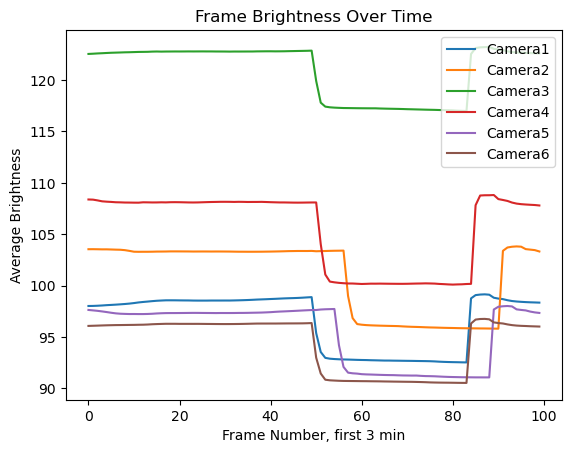

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24: {'Camera1': [50], 'Camera2': [57, 58], 'Camera3': [50, 51], 'Camera4': [51, 52], 'Camera5': [55, 56], 'Camera6': [50]}
Processed drop frames: {'Camera1': 50, 'Camera2': 58, 'Camera3': 51, 'Camera4': 52, 'Camera5': 56, 'Camera6': 50}
50
alined data saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24/df_synced_2social_mini_20241015pmcr2_single_AO_13_24_2024_11_07_2social_mini_20241015pmcr2_single_AO_13_24_calib_before_label3d_dannce.mat
Alignment successful for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24
Moved prior calibration file to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24/prev_calib


True

In [5]:
from utlis.sync_utlis.sync_df_utlis import process_sync
# base_folder = '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3'

# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_03/20240819V1r2'
# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_30/2social_mini_0605pmc_single_15_18'
base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_11_07/2social_mini_20241015pmcr2_single_AO_13_24'
process_sync(base_folder, threshold=2, max_frames=300, min_frame=200) #, min_frame=150 here the min frame will actually shift it which is not ideal, but it works, all we need is alignment so whatever...

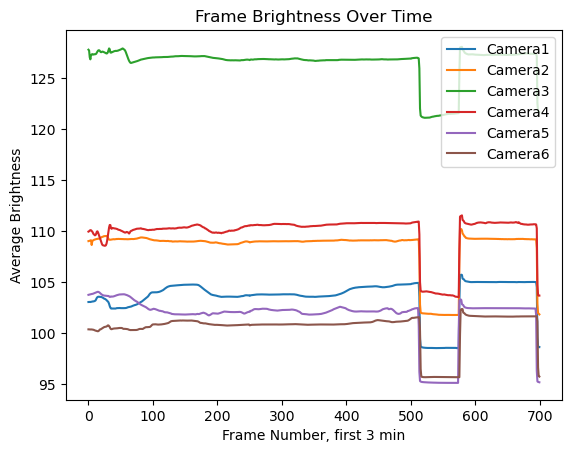

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03: {'Camera1': [514, 696], 'Camera2': [514, 696], 'Camera3': [514, 696], 'Camera4': [514, 696], 'Camera5': [513, 695], 'Camera6': [515, 697]}
Processed drop frames: {'Camera1': 514, 'Camera2': 514, 'Camera3': 514, 'Camera4': 514, 'Camera5': 513, 'Camera6': 515}
513
alined data saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03/df_synced_20240916v1r1_16_03_2024_10_08_20240916v1r1_16_03_calib_before_label3d_dannce.mat
Alignment successful for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03
Moved prior calibration file to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03/prev_calib


In [5]:
# List of base folders to process
base_folders = [
    # '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_22',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_16_03',
    # '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1/2024_10_08/20240916v1r1_15_53'
    # Add more paths as needed
]

# Loop through each base folder and process it
for folder in base_folders:
    process_sync(folder, threshold=2, max_frames=700)


plotting com_traga for /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_02/1691486_left_right_saline_1430


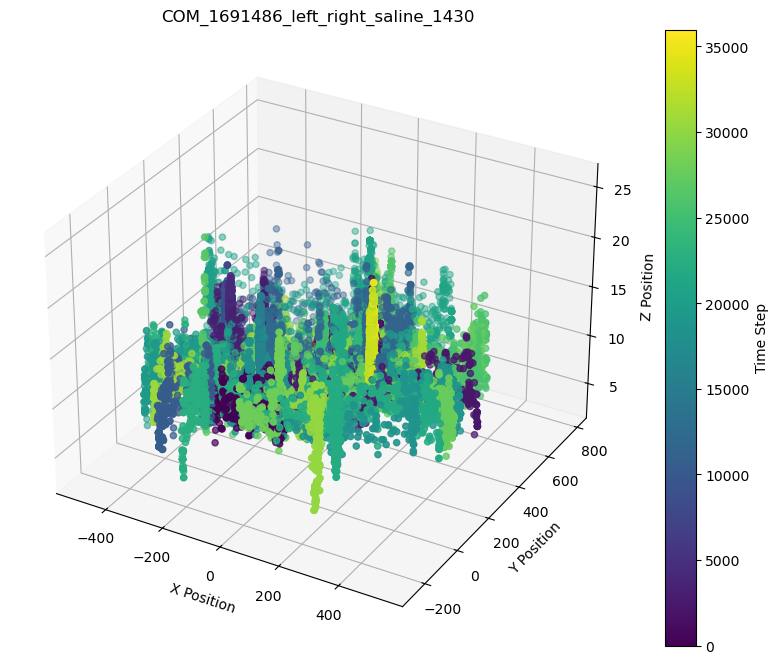

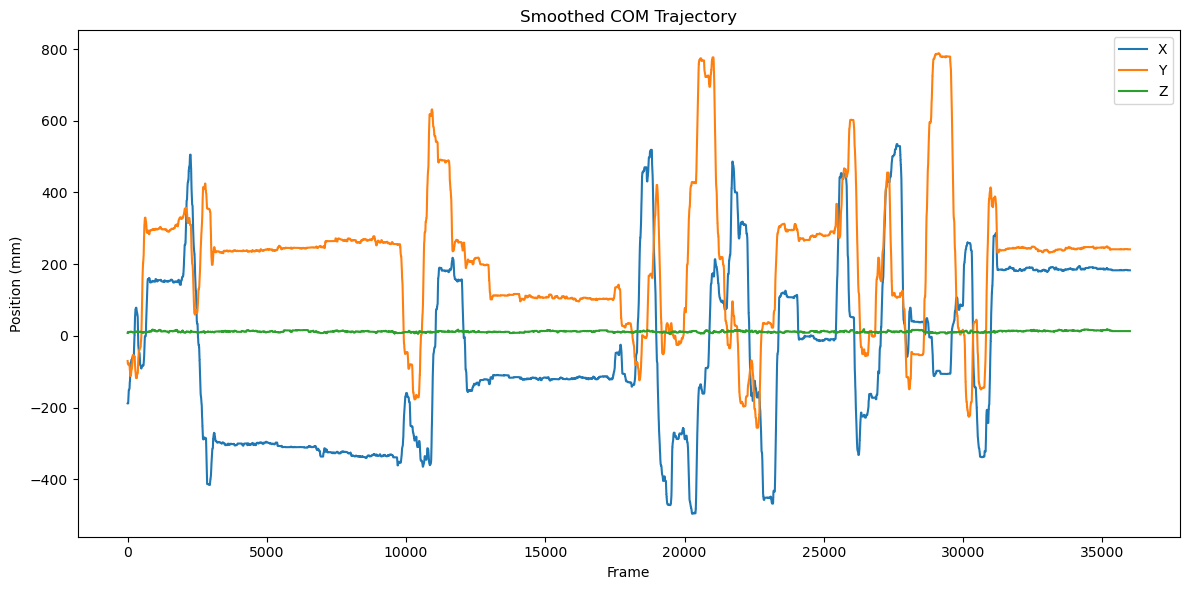

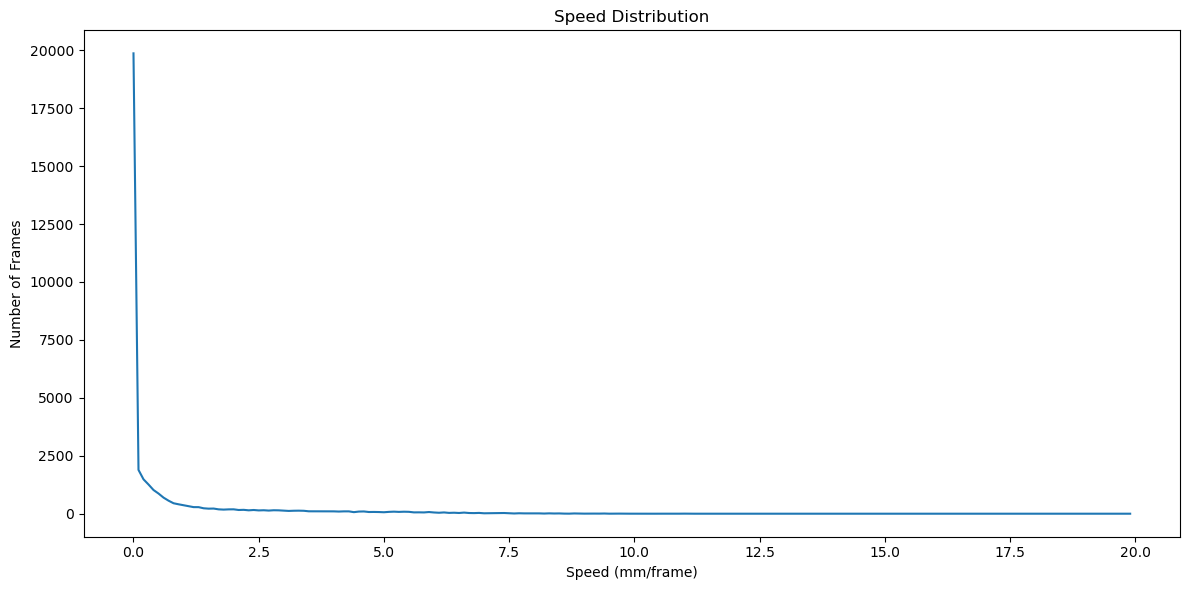

Analysis complete. Plots saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_02/1691486_left_right_saline_1430/COM/predict00/vis


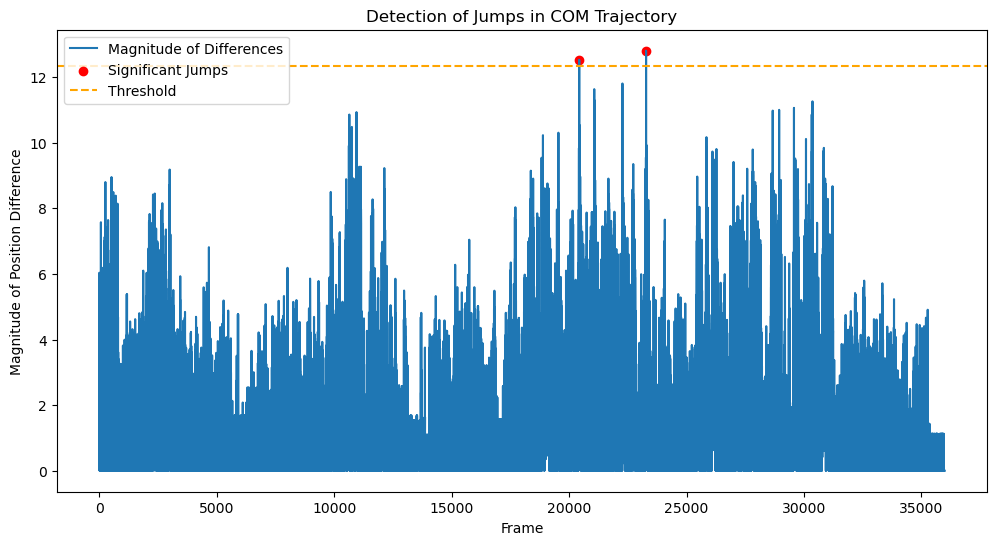

saved into npy. Frames with significant jumps: [20431 23277]
2
N_FRAMES 2
pred_2d 2


100%|██████████| 2/2 [00:30<00:00, 15.05s/it]


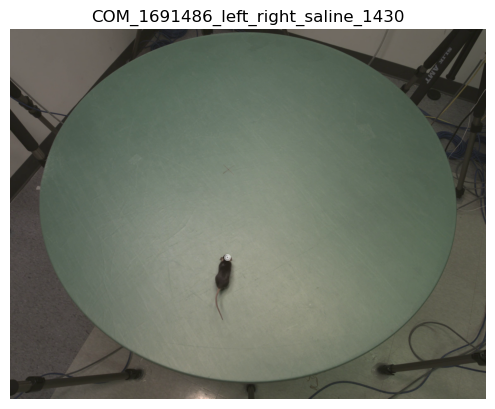

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../..'))
from utlis.vis_valid_utlis.com_trag_updated import plot_com_all

base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_02/1691486_left_right_saline_1430'
plot_com_all(base_folder, perform_jump_indices=True, perform_video_generation=True) #com_folder_name='COM/predict00', perform_jump_indices=True, perform_video_generation=False, perform_generate_com_video=False

In [8]:
dry_run = False 
txt_file = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/paret/com_1point_reruns.txt"
slurm_launch_file = '/hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py'

# def check_expdir(expdir):
#     if not os.path.exists(expdir):
#         print(f"Skipping: Experiment directory {expdir} does not exist")
#         return None  # Return None or skip processing this directory
#     return expdir


# Function to create the full expdir path and print the command for dry-run
def run_command(expdir_path, dry_run=True):
    # expdir_path = os.path.join(base_path, date_folder, rec_file)
    
    # Check if the experiment directory exists before running the command
    # if check_expdir(expdir_path) is None:
    #     return  # Skip this execution if the directory does not exist
    
    # command = f"python {slurm_launch_file} --expdir {expdir_path} --predict_com"
    command = f"conda run -n sdannce python {slurm_launch_file} --expdir {expdir_path} --predict_com --allow_overwrite" # --allow_overwrite remove allow_overwrite by default.

    if dry_run:
        print(f"[DRY-RUN] Command: {command}")
    else:
        print(f"Executing command: {command}")
        os.system(command)
# Read the experiment directories from the .txt file and execute the command for each
with open(txt_file, 'r') as f:
    for line in f:
        expdir_path = line.strip()
        if not relative_path:
            continue  # Skip empty lines
        # expdir_path = os.path.join(base_path, relative_path)
        run_command(expdir_path, dry_run)

Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_06_27/1686941_left_right --predict_com --allow_overwrite


Specified a single expdir; running predictions ...
Running command:  cd /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_06_27/1686941_left_right
dannce predict com /hpc/group/tdunn/tqxli/sdannce_scripts/configs/com_mouse_config.yaml --com-predict-weights=/hpc/group/tdunn/tqxli/sdannce_scripts/weights/COM/checkpoint-epoch20.pth --com-predict-dir=COM/predict00 --max-num-samples 100000 --batch-size=1
Slurm out: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_06_27/1686941_left_right/slurm/predict_com_1686941_left_right.out
Submitted batch job 19327385

Executing command: conda run -n sdannce python /hpc/group/tdunn/lq53/tianqing_pytorch_dannce/dannce_/slurm_launch_predict.py --expdir /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1128 --predict_com --allow_overwrite
Specified a single expdir; running predictions ...
Running command:  cd /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1128
dannce predict com /hpc/

In [12]:
# check if there is multi files.
# import glob
# import os
# from collections import defaultdict

# # Define the path where the files are located
# folder_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ'

# # Use glob to match the pattern
# files = glob.glob(f"{folder_path}/*/*/*label3d_dannce.mat")

# # Group files by their directory
# directory_files = defaultdict(list)
# for file in files:
#     directory = os.path.dirname(file)
#     directory_files[directory].append(file)

# # Print directories with multiple files
# for directory, files_in_dir in directory_files.items():
#     if len(files_in_dir) > 1:
#         print(f"Directory '{directory}' has multiple files:")
#         for file in files_in_dir:
#             print(f"  {file}")
#     # else:
#         # print(f"{directory} does note have multi files. all good.")

In [2]:
# def rough_bundle_sync(base_path, dates, threshold=3, max_frames=500, stepmax_frame = 1000):
#     missing_folders = []
#     successful_folders = []

#     for date in dates:
#         date_path = os.path.join(base_path, date)
#         if not os.path.exists(date_path):
#             print(f"Date folder {date_path} does not exist. Skipping.")
#             continue

#         calib_file = find_calib_file(date_path)
#         print("find calib files", calib_file)
#         if not calib_file:
#             print(f"No calibration file found in {date_path}. Skipping.")
#             continue

#         calib_nammm = os.path.basename(calib_file)
#         # print(calib_nammm)

#         for folder_name in os.listdir(date_path):
#             folder_path = os.path.join(date_path, folder_name)

#             if os.path.isdir(folder_path) and folder_name[0].isdigit():
#                 save_path = os.path.join(folder_path, f'df_synced_{folder_name}_{calib_nammm}') #f'pos_synced_{folder_name}_{calib_nammm}'
#                 vi_path = os.path.join(folder_path, 'videos')

#                 drop_frames = process_videos(vi_path, threshold, max_frames)
#                 print(f"Detected intensity drop frames in {folder_name}:", drop_frames)

#                 if any(len(frames) == 0 for frames in drop_frames.values()):
#                     missing_folders.append(folder_path)
#                     print(f"Skipping process_calibration_data for {folder_name} due to missing drop frames")
#                 else:
#                     successful_folders.append(folder_path)
#                     align_frames(calib_file, drop_frames, save_path)
#                     # update_calib(calib_file, drop_frames, save_path)
#                     # print('h')

#     print('Missing folders:', missing_folders)
#     return missing_folders, successful_folders

In [ ]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z

# # base_path = 'G:/Videos/6cam/lq53/2024_09_16_test_chris_new/'
# # calib_path = os.path.join(base_path, 'calib_before_3/chris_new/')
# # vid_path = 'rec_test_1'
# # output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# # mir_generate_param_z(base_path, calib_path, vid_path, output_file)

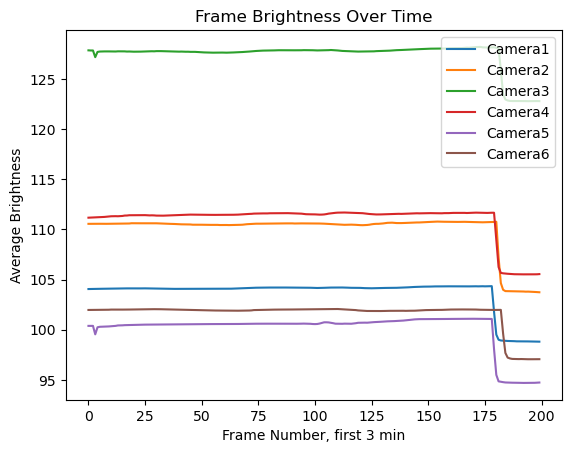

Detected intensity drop frames in /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240717_PMCr1: {'Camera1': [179, 180], 'Camera2': [181, 182], 'Camera3': [182, 183], 'Camera4': [180, 181], 'Camera5': [179, 180], 'Camera6': [183]}
Processed drop frames: {'Camera1': 180, 'Camera2': 182, 'Camera3': 183, 'Camera4': 181, 'Camera5': 180, 'Camera6': 183}
180
1
> /hpc/group/tdunn/lq53/BBOP/utlis/sync_utlis/sync_df_utlis.py(146)align_frames()
    144         pdb.set_trace()
    145 
--> 146         print(sync[cam_idx][0][keyyyyy])
    147         data_frame = sync[cam_idx][0][keyyyyy][0][0][0]
    148         print(2)

[]
Error during alignment: index 0 is out of bounds for axis 0 with size 0


False

In [2]:
# # base_folder = '/hpc/group/tdunn/lq53/sync_camera_/rawvid_mirstop_30s_light_3'

# base_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/20240707-PMC-r1'

# process_sync(base_folder, threshold=2, max_frames=200)

In [4]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29'
# calib_path = os.path.join(base_path, 'z_updated_hires')
# vid_path = '20240717_PMCr2'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27900
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/z_updated_hires/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_29/20240717_PMCr2/z_updated_hires_label3d_dannce.mat


True

In [7]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26'
# calib_path = os.path.join(base_path, 'z_updated_hires')
# vid_path = '20240730_PMCr2'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27900
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/z_updated_hires/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_08_26/20240730_PMCr2/z_updated_hires_label3d_dannce.mat


True

In [2]:
# # also adding the exe generation for mir_generate param, for future references:
# import sys
# import os
# sys.path.append(os.path.abspath('../..'))

# from utlis.exe_engine_utlis.mir_generate_param_modu import mir_generate_param_z
# base_path = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18'
# calib_path = os.path.join(base_path, 'calib_before_13_17')
# vid_path = '20240707-PMC-r1'
# output_file = f'{os.path.basename(calib_path)}_label3d_dannce.mat'

# mir_generate_param_z(base_path, calib_path, vid_path, output_file)

Found 6 calibration files.
Frame count: 27300
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam1_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam2_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam3_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam4_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam5_params.mat
Processed /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/calib_before_13_17/hires_cam6_params.mat
Data saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_09_18/20240707-PMC-r1/calib_before_13_17_label3d_dannce.mat


True